### Task 1:
Understand the Problem Statement and Business Case
* For companies to become competitive and skyrocket their growth, they need to leverage AI/ML to develop predictive models to forecast sales in the future.* 
Predictive models attempt at forecasting future sales based on historical data while taking into account seasonality effects, demand, holidays  promotions, and competition
* In this project, you work as a data scientist in the sales department and the sales team provided you with data from 1115 stores.
* The objective is to predict future daily sales prices based on the historical data.. 


### Task 2 
Import Libraries and DataSet

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Inputs and Expected Outputs 
* Id: transaction ID (combination of Store and date)
* Store: unique store Id
* Sales: sales/day, this is the target variable 
* Customers: number of customers on a given day
* Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
* Promo: describes if store is running a promo on   that day or not
* StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
* SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools


2.1 Import Sales Training Data 

In [6]:
sales_train_df = pd.read_csv('train.csv')

C:\Users\vulev\AppData\Local\Temp\ipykernel_6792\1244316221.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [7]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### Average sales amount per day = 5773 Euros, 
#### Minimum sales per day = 0, 
#### Maximum sales per day = 41551 
#### Average number of customers = 633, 
#### Minimum number of customers = 0, 
#### Maximum number of customers = 7388

2.2 Import Store Information Data

* StoreType: categorical variable to indicate type of store (a, b, c, d)
* Assortment: describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance (meters): distance to closest competitor store
* CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
* Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
* Promo2Since [Year/Week]: date when the store started participating in Promo2
* PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means     each round starts in February, May, August, November of any given year for that store


In [11]:
store_info_df = pd.read_csv('store.csv')

In [12]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


On average,how far is the competitor in distance in KM and M?

In [14]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


5.4 KMS
5404 M

### Task 3 Expolre Data Set 
#### 3.1 Explore Sales Training Data

* Missing data

<Axes: >

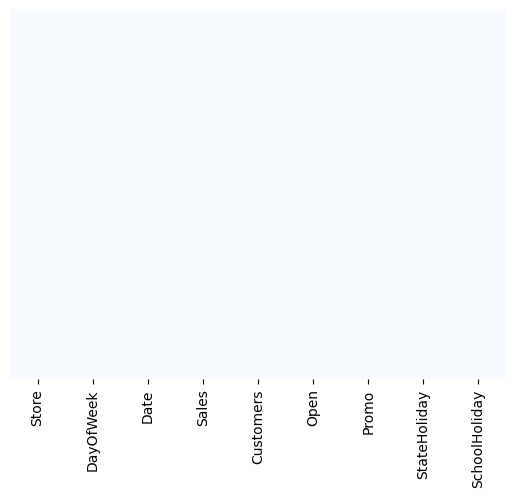

In [15]:
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')


* Observations of the data through Histogram

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

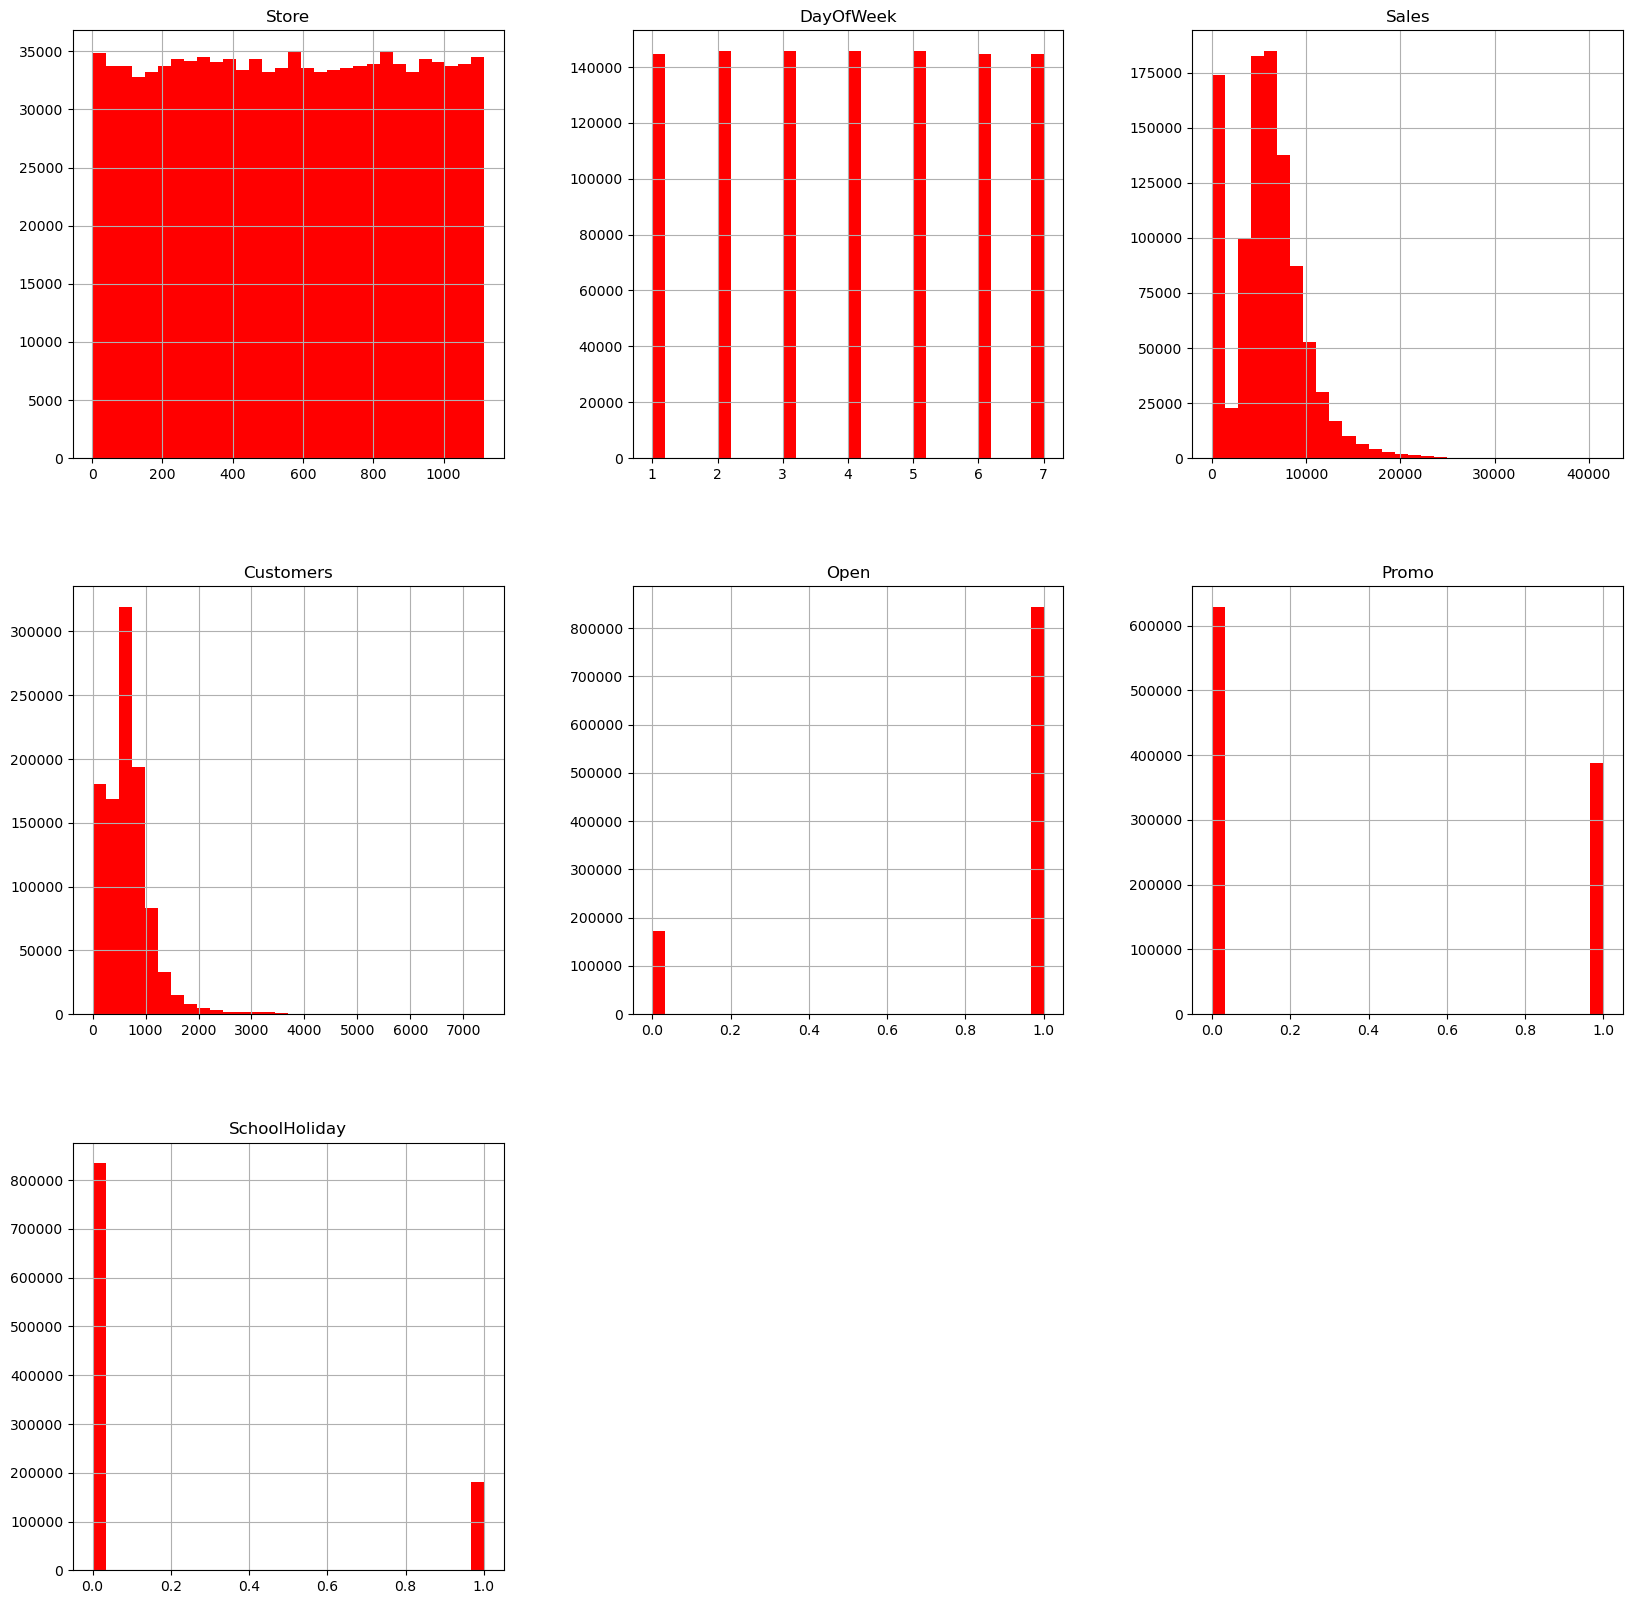

In [18]:
sales_train_df.hist(bins = 30, figsize = (20,20), color = "r")

* Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
* Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
* Stores are open ~80% of the time
* Data is equally distributed among all stores (no bias)
* Promo #1 was running 60% of the time 
* Average sales around 5000-6000 Euros
* School holidays are around ~18% of the time

* What is the actual numbers of customers?

In [19]:
sales_train_df['Customers'].max()

7388

* How many stores in reality are open and closed?

In [20]:
closed_train_df = sales_train_df[sales_train_df['Open']==0]
open_train_df = sales_train_df[sales_train_df['Open']==1]

In [21]:
print('Total = ', len(sales_train_df))
print('Number of closed stores = ', len(closed_train_df))
print('Number of Open stores = ', len(open_train_df))

Total =  1017209
Number of closed stores =  172817
Number of Open stores =  844392


* Keep only open stores and remove closed stores

In [22]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [23]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


* Drop the open column

In [24]:
sales_train_df.drop(['Open'], axis = 1, inplace = True)

In [25]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


* What is the actual values of the average sales and number of customers?

In [26]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### 3.2 Explore Stores Information Data

* Do we have any missing data in the store information dataframe?

<Axes: >

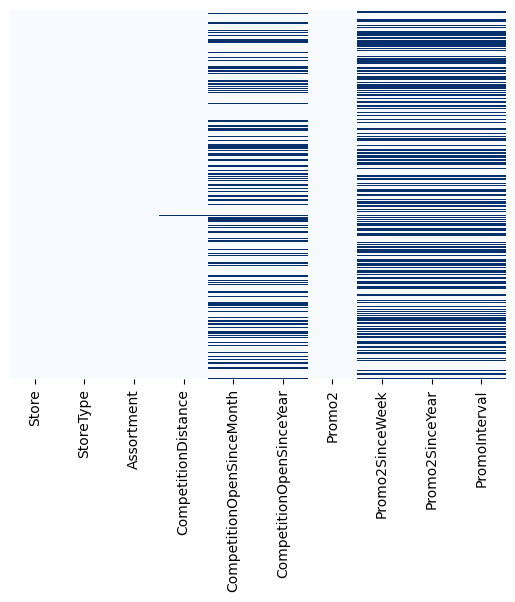

In [27]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

* What are the missing values in the 'CompetitionDistance'?

In [28]:
store_info_df [store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


* What are the missing values in the 'CompetitionOpenSinceMonth'?

In [29]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


* What was happening when Promo 2 = 0?
* When Promo 2 is = 0, all the remaining columns related to Promo 2 is Not a Numberstore

In [30]:
store_info_df[store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


* List all the columns NaN = 0

In [31]:
str_cols = ['Promo2SinceWeek' , 'Promo2SinceYear' , 'PromoInterval' , 'CompetitionOpenSinceYear' , 'CompetitionOpenSinceMonth']

In [32]:
for str in str_cols:
    store_info_df[str].fillna(0, inplace = True)

C:\Users\vulev\AppData\Local\Temp\ipykernel_6792\793105113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0, inplace = True)


<Axes: >

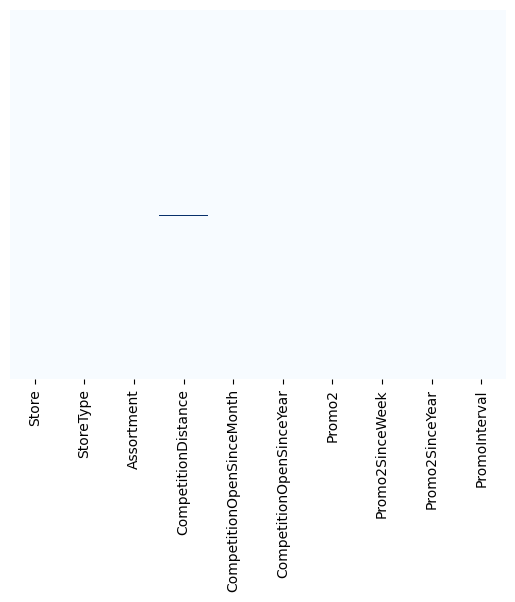

In [33]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

* Set the average of the missing data on Competition data 

In [34]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

C:\Users\vulev\AppData\Local\Temp\ipykernel_6792\4179222088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)


<Axes: >

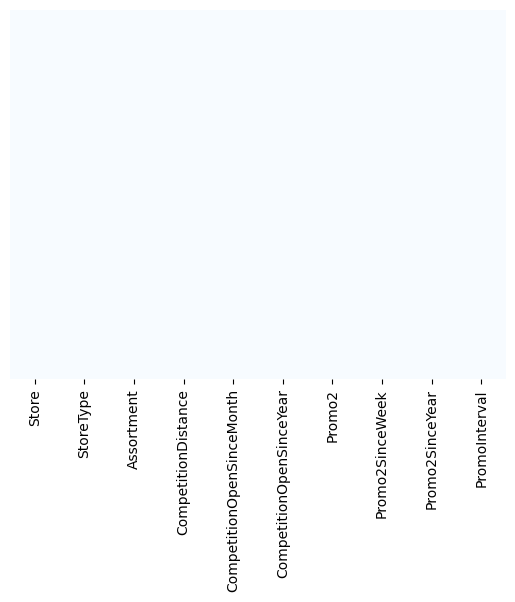

In [35]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

* Plot the Histogram for the Store Information Data

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

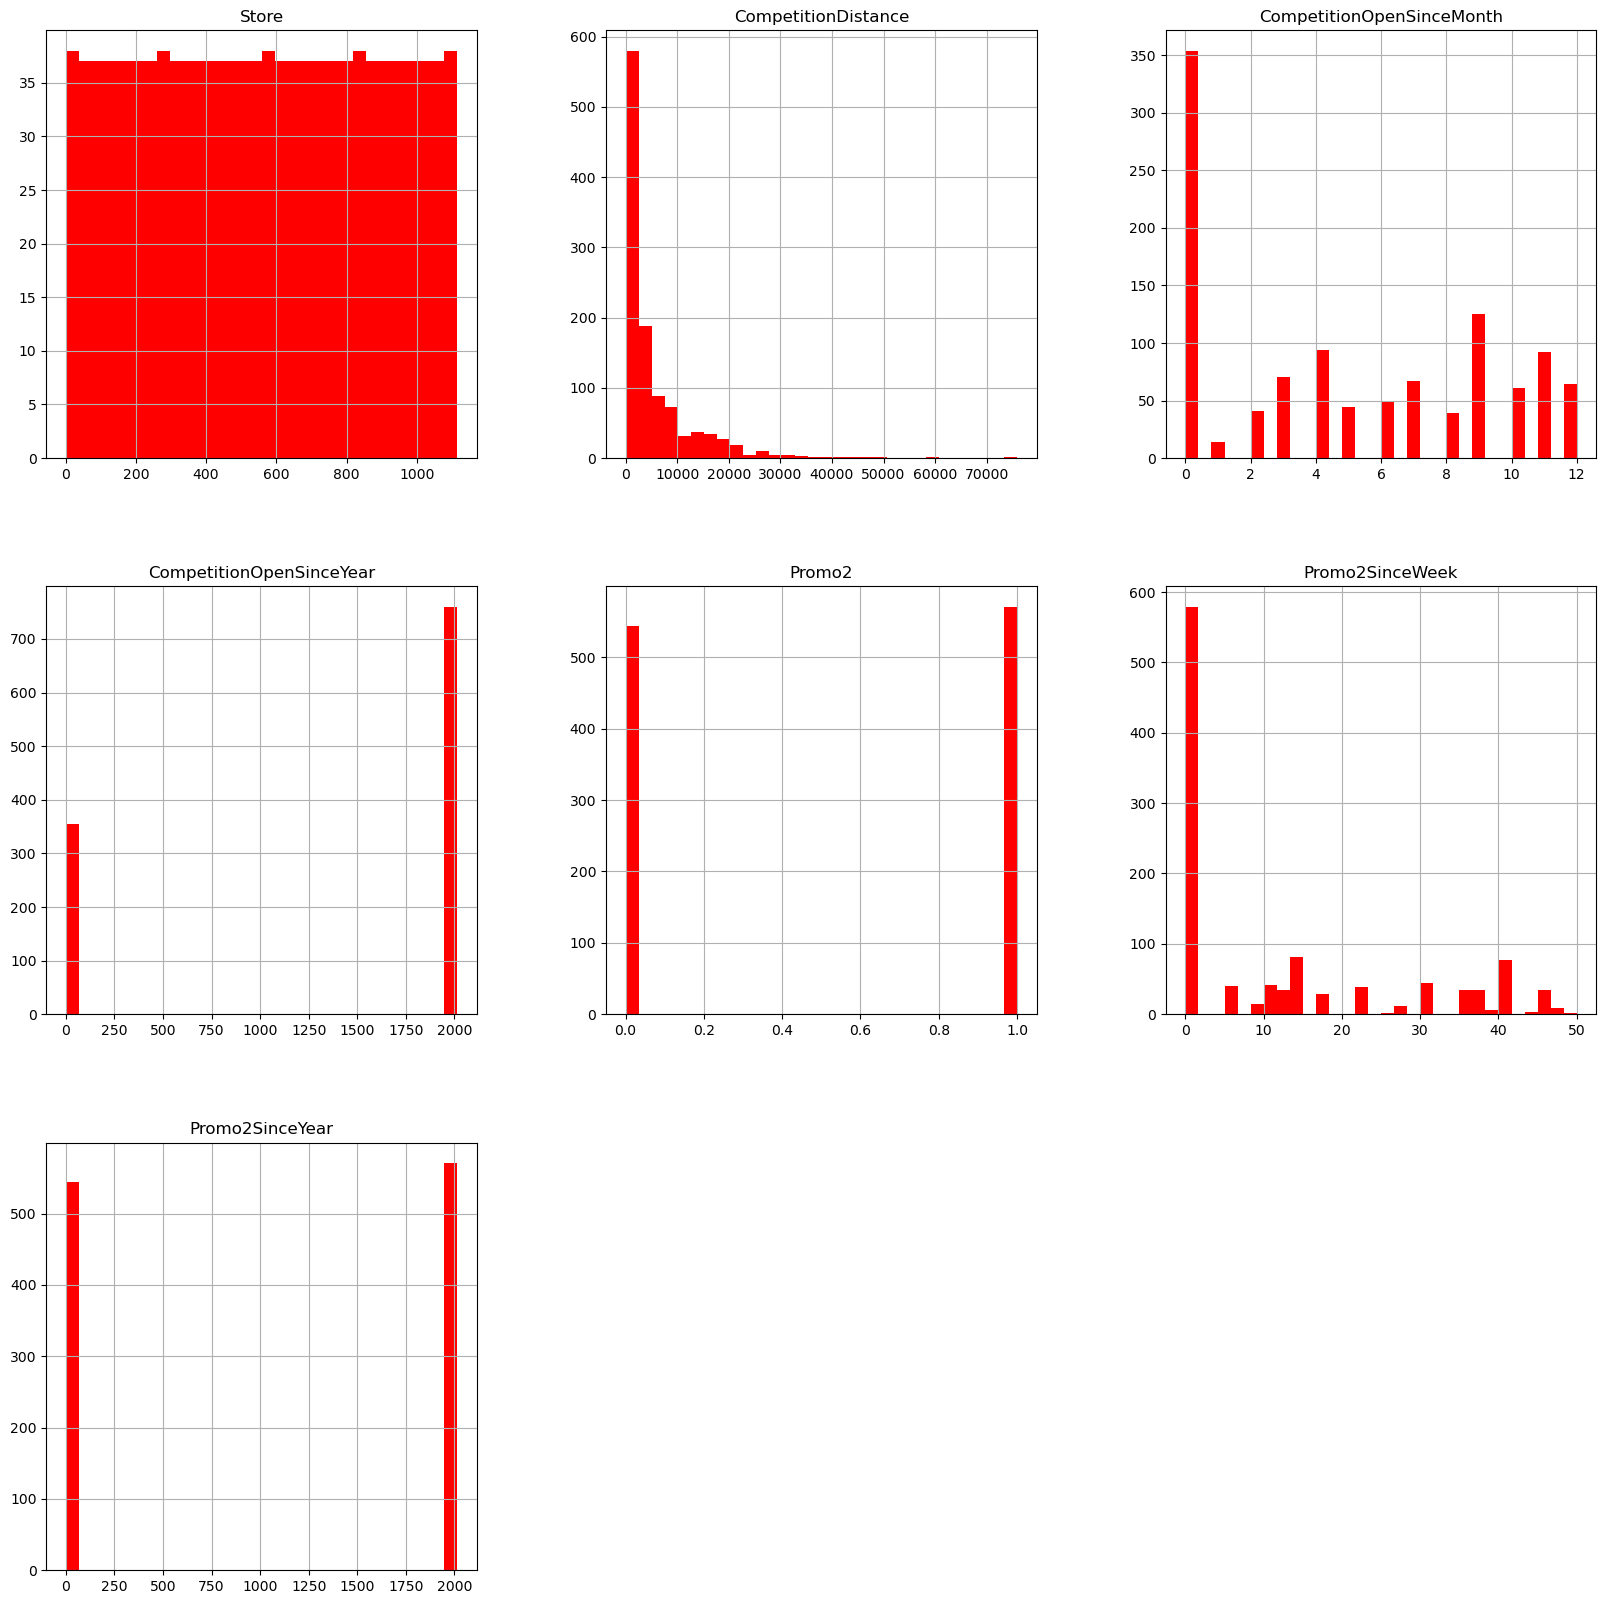

In [36]:
store_info_df.hist(bins = 30, figsize = (20,20), color = 'r')

* half of stores are involved in promo 2
* half of the stores have their competition at a distance of 0-3000m (3 kms away)

#### 3.3 Explore Merged DataSet

In [37]:
# Merge both data frames together based on 'Store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [38]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [104]:
# Find the correlation between the data

# Select only numeric columns to avoid the 'Date' column issue
numeric_df = sales_train_all_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with respect to 'Sales'
correlations_sales = numeric_df.corr()['Sales'].sort_values()

# Calculate the full correlation matrix for numeric columns
correlations_all = numeric_df.corr()

# Display the results
correlations_sales, correlations_all

(DayOfWeek                   -0.178736
 Promo2SinceYear             -0.127621
 Promo2                      -0.127596
 Promo2SinceWeek             -0.058476
 CompetitionDistance         -0.036343
 CompetitionOpenSinceMonth   -0.018370
 CompetitionOpenSinceYear     0.005266
 Store                        0.007710
 SchoolHoliday                0.038617
 Promo                        0.368145
 Customers                    0.823597
 Sales                        1.000000
 Name: Sales, dtype: float64,
                               Store  DayOfWeek     Sales  Customers     Promo  \
 Store                      1.000000   0.000346  0.007710   0.033977 -0.000012   
 DayOfWeek                  0.000346   1.000000 -0.178736  -0.097266 -0.289265   
 Sales                      0.007710  -0.178736  1.000000   0.823597  0.368145   
 Customers                  0.033977  -0.097266  0.823597   1.000000  0.182846   
 Promo                     -0.000012  -0.289265  0.368145   0.182846  1.000000   
 SchoolHol

In [39]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

ValueError: could not convert string to float: '2015-07-31'

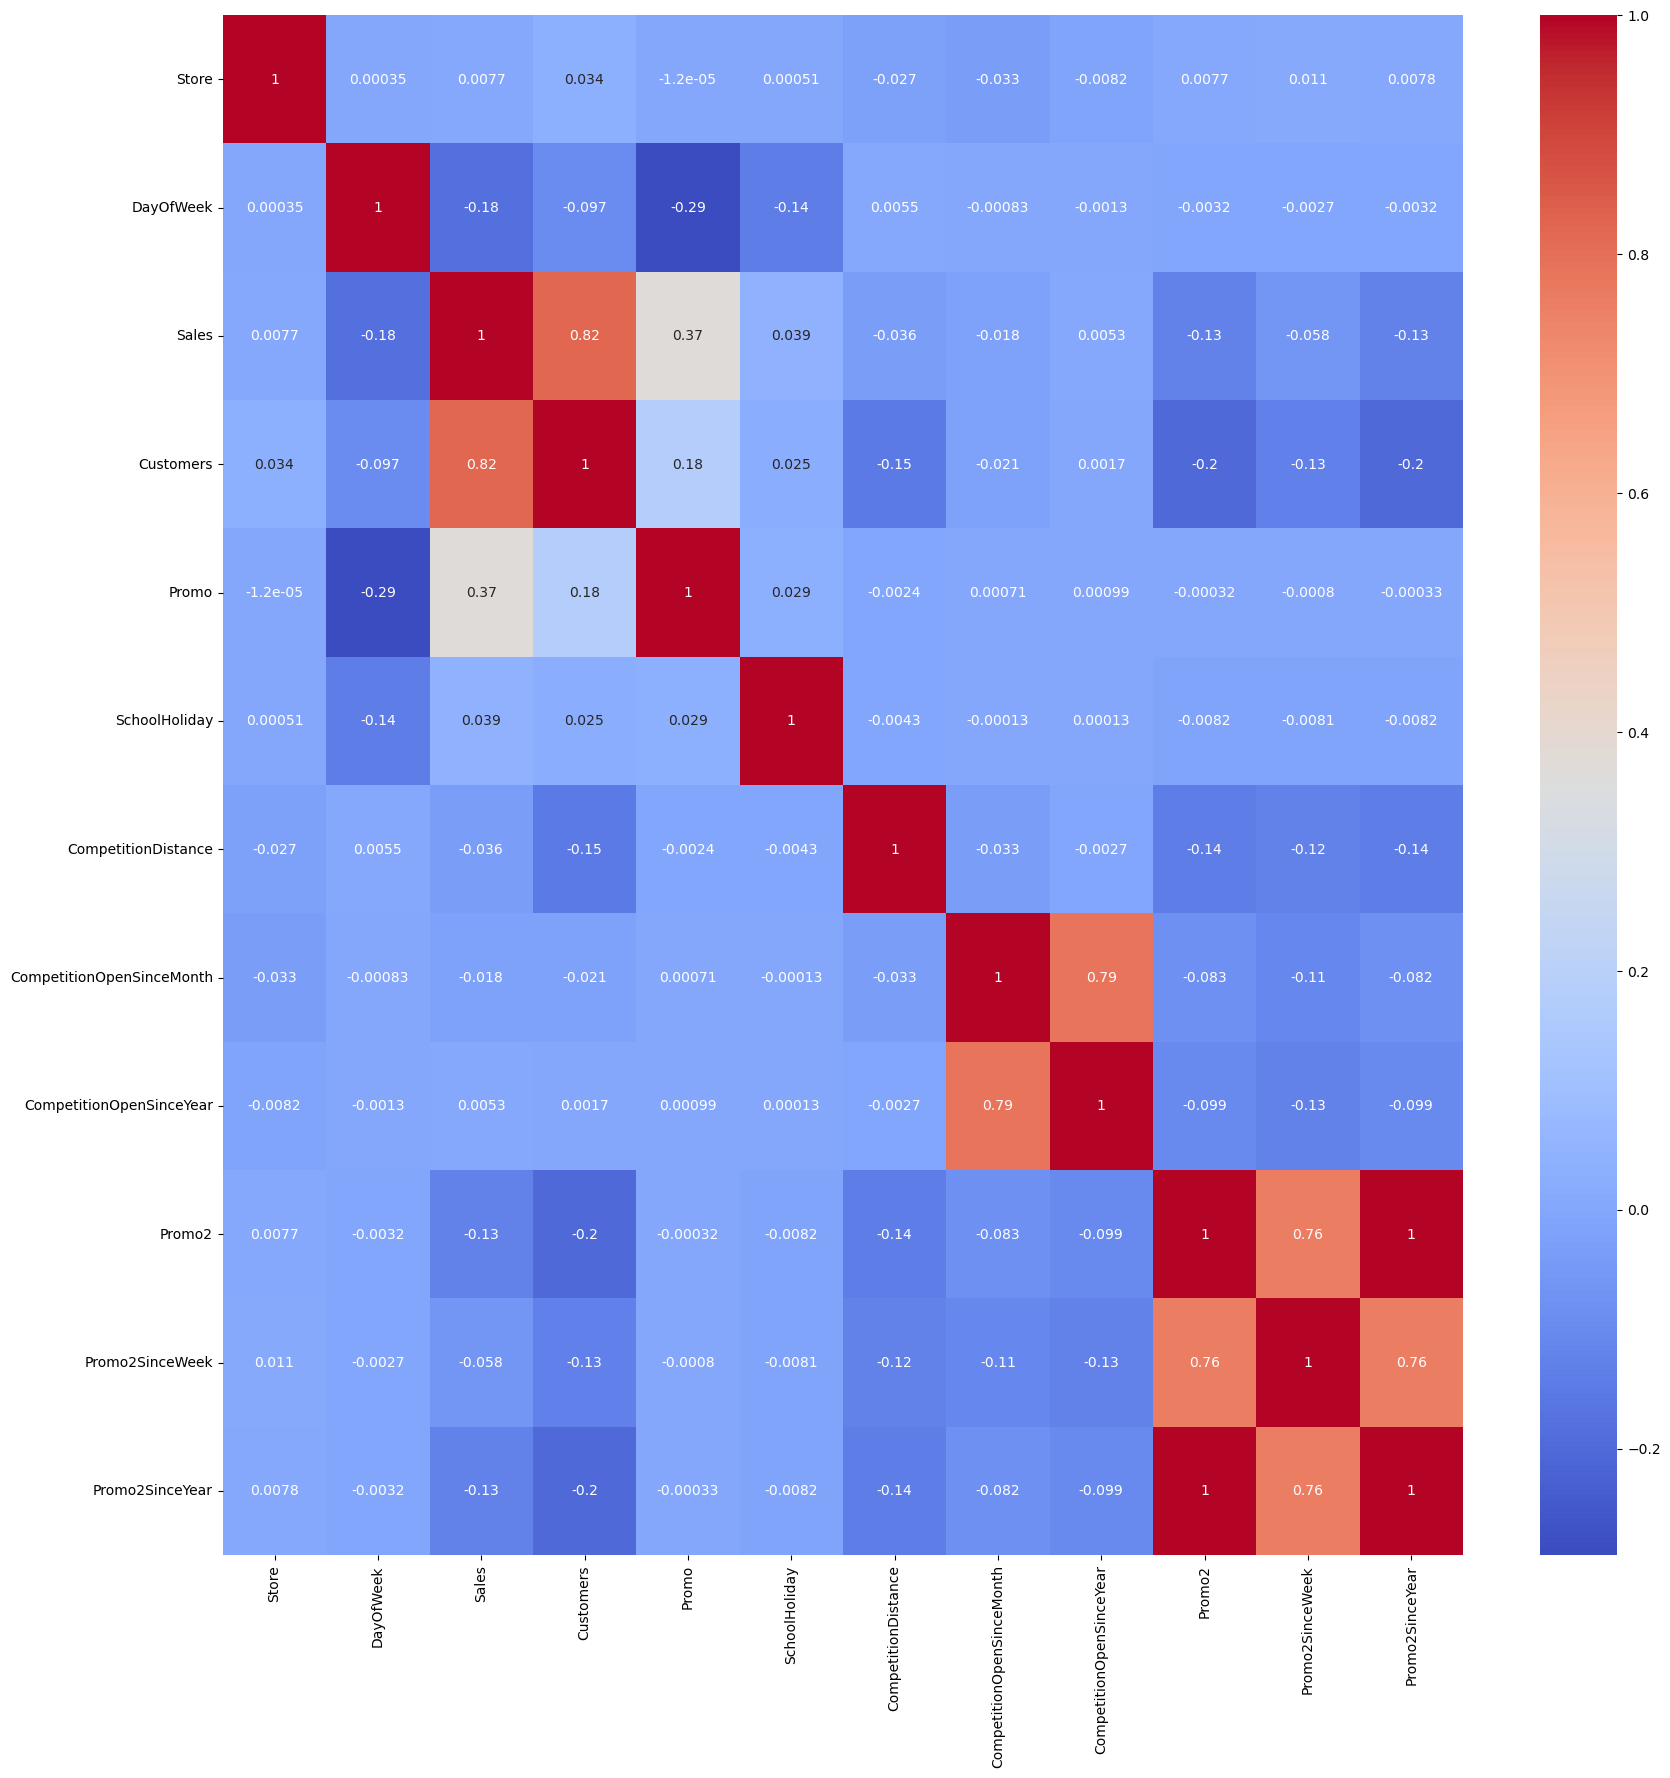

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used for the correlation matrix
numeric_df = sales_train_all_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlations = numeric_df.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlations, annot=True, cmap='coolwarm', ax=ax)

# Show the heatmap
plt.show()

In [40]:
# Separate the year and put it into a separate column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year 

In [106]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844370,1111,3,2013-01-02,5097,505,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,2
844371,1112,3,2013-01-02,10797,892,0,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,2013,1,2
844372,1113,3,2013-01-02,6218,753,0,0,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,2013,1,2
844373,1114,3,2013-01-02,20642,3401,0,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0,2013,1,2


In [42]:
# Lets do the same for the day and month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month 
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [43]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


Text(0.5, 1.0, 'Average Customers Per Month')

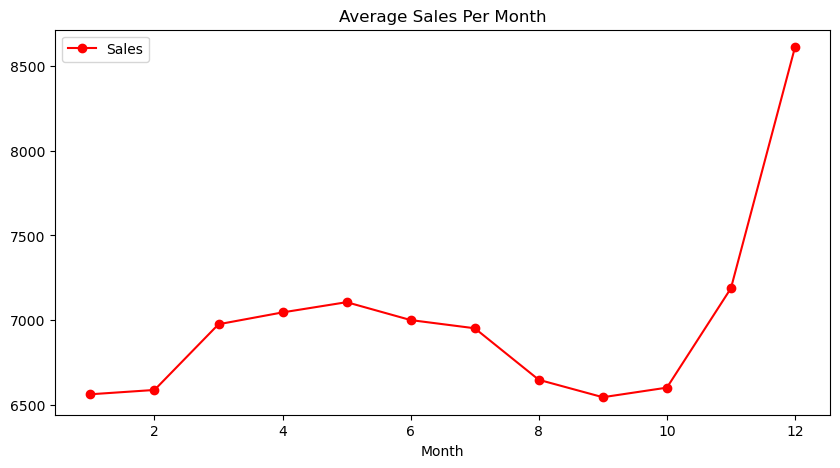

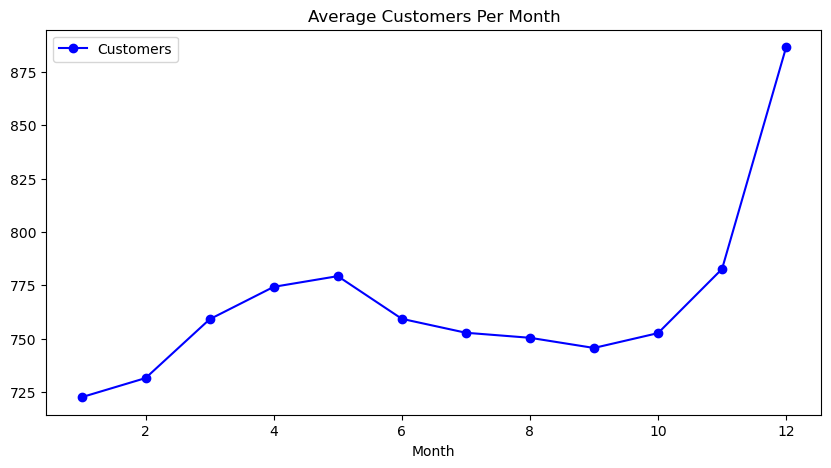

In [116]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure

axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

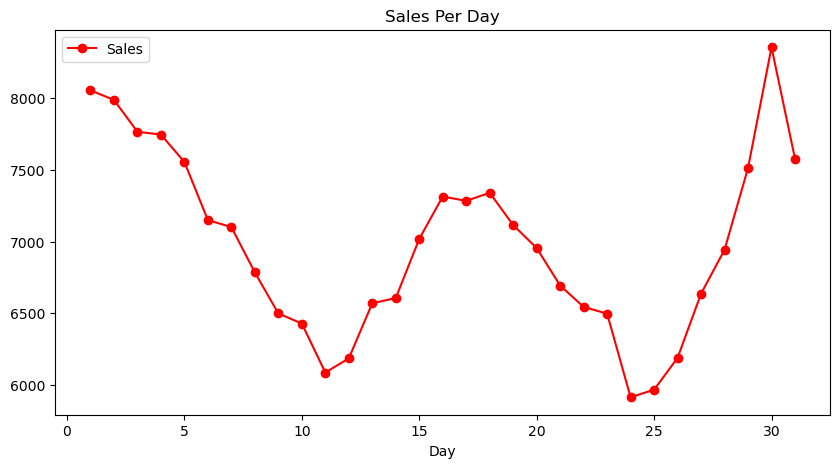

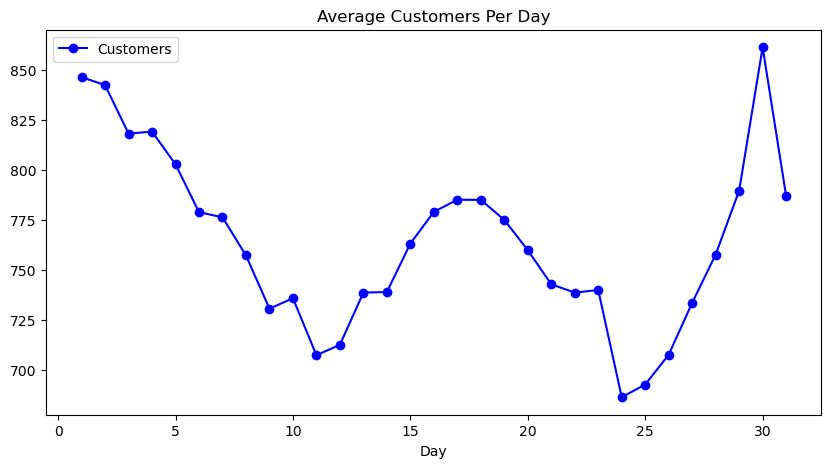

In [44]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Sales Per Day')

plt.figure

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers Per Day of the week')

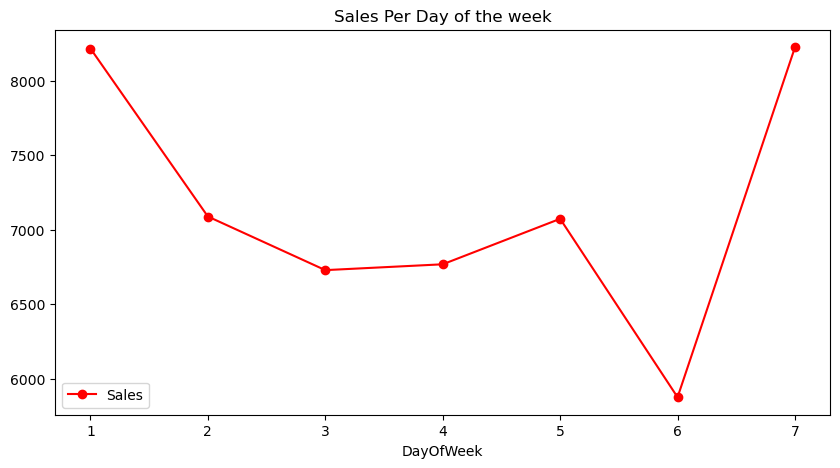

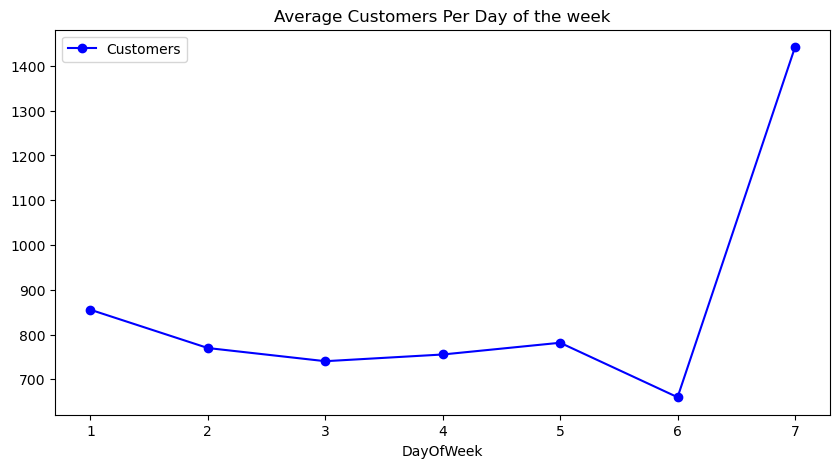

In [45]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title('Sales Per Day of the week')

plt.figure

axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day of the week')

TypeError: agg function failed [how->mean,dtype->object]

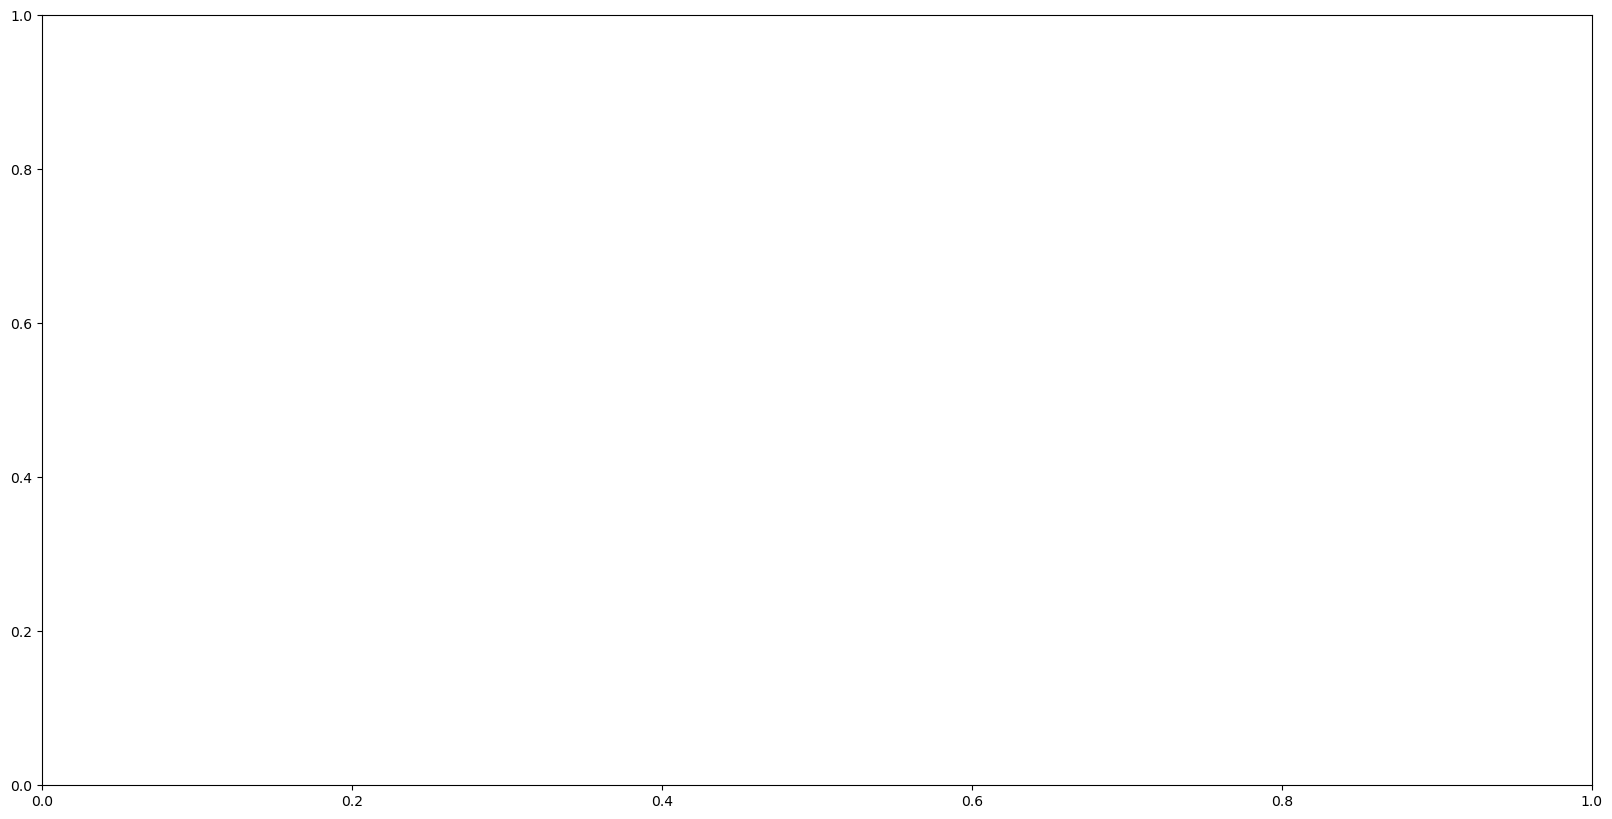

In [46]:
# Which store type has the highest number of sales based on the revenue?

fig, ax =plt.subplots(figsize = (20, 10))

sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

C:\Users\vulev\AppData\Local\Temp\ipykernel_6792\1773208446.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_train_all_df['StateHoliday'] = sales_train_all_df['StateHoliday'].replace({'0': 0, '1': 1})
C:\Users\vulev\AppData\Local\Temp\ipykernel_6792\1773208446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_all_df['StateHoliday'] = sales_train_all_df['StateHoliday'].replace({'0': 0, '1': 1})


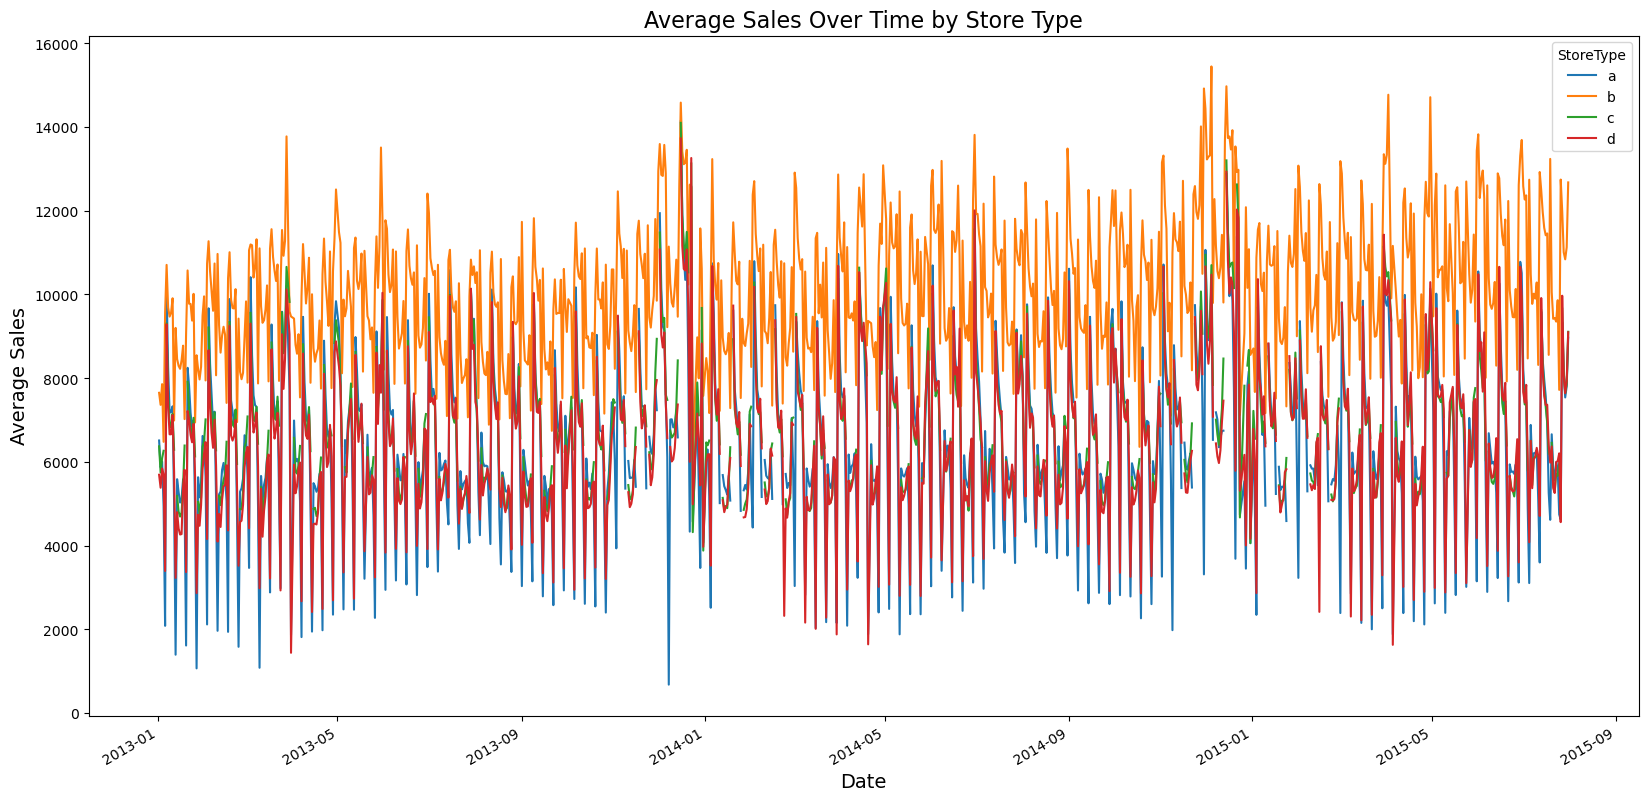

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if it's not already
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])

# Ensure 'StateHoliday' column has a numeric format (0 for no holiday, 1 for holiday)
# This will fail if it contains alphabetic characters like 'a', 'b', etc. So we filter them out.
sales_train_all_df = sales_train_all_df[sales_train_all_df['StateHoliday'].isin([0, '0', '1'])]

# Convert 'StateHoliday' to numeric if necessary
sales_train_all_df['StateHoliday'] = sales_train_all_df['StateHoliday'].replace({'0': 0, '1': 1})

# Group by 'Date' and 'StoreType', and take the mean only of numeric columns
mean_sales = sales_train_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales']

# Unstack 'StoreType' to have separate columns for each store type
mean_sales_unstacked = mean_sales.unstack()

# Plot the result
fig, ax = plt.subplots(figsize=(20, 10))
mean_sales_unstacked.plot(ax=ax)

# Add title and labels
ax.set_title('Average Sales Over Time by Store Type', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)

# Show the plot
plt.show()

<Axes: xlabel='Promo', ylabel='Customers'>

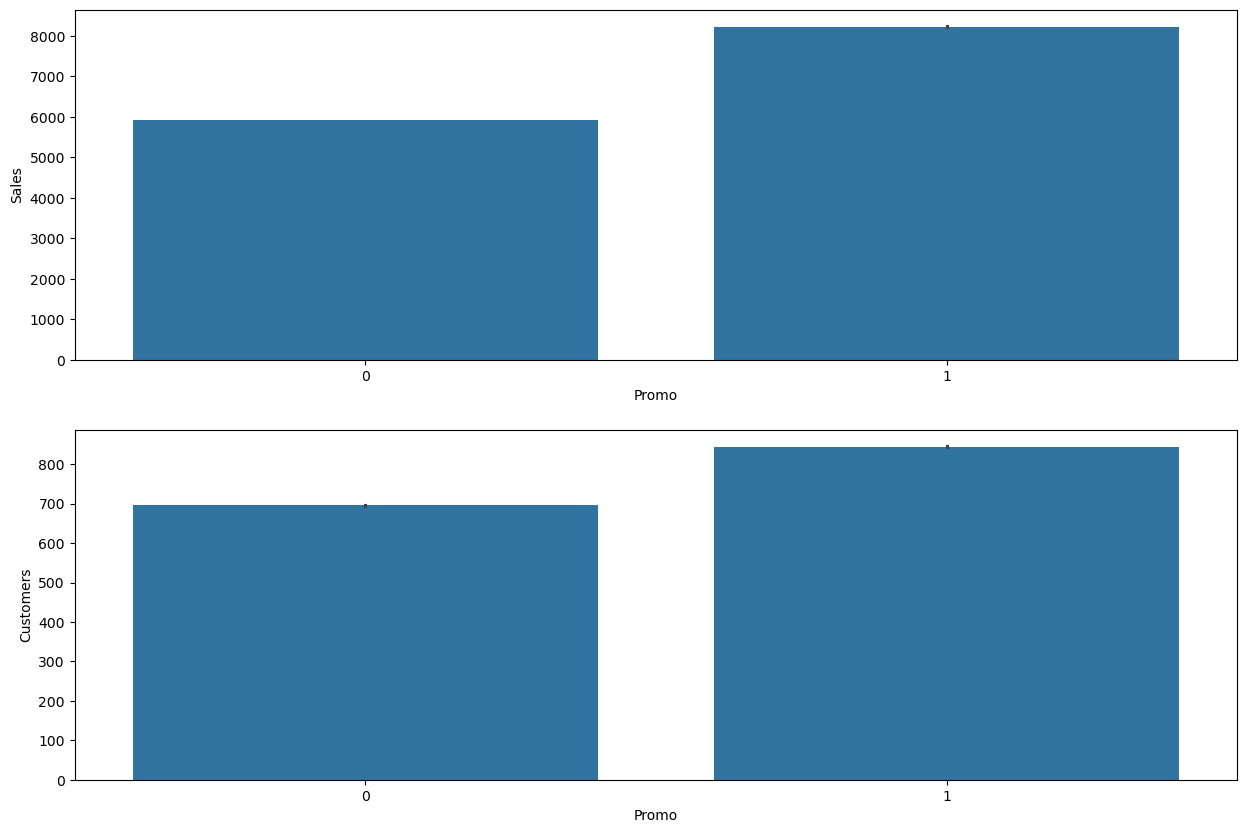

In [48]:
# Lets see if the promo makes an effect on sales and customers?

plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

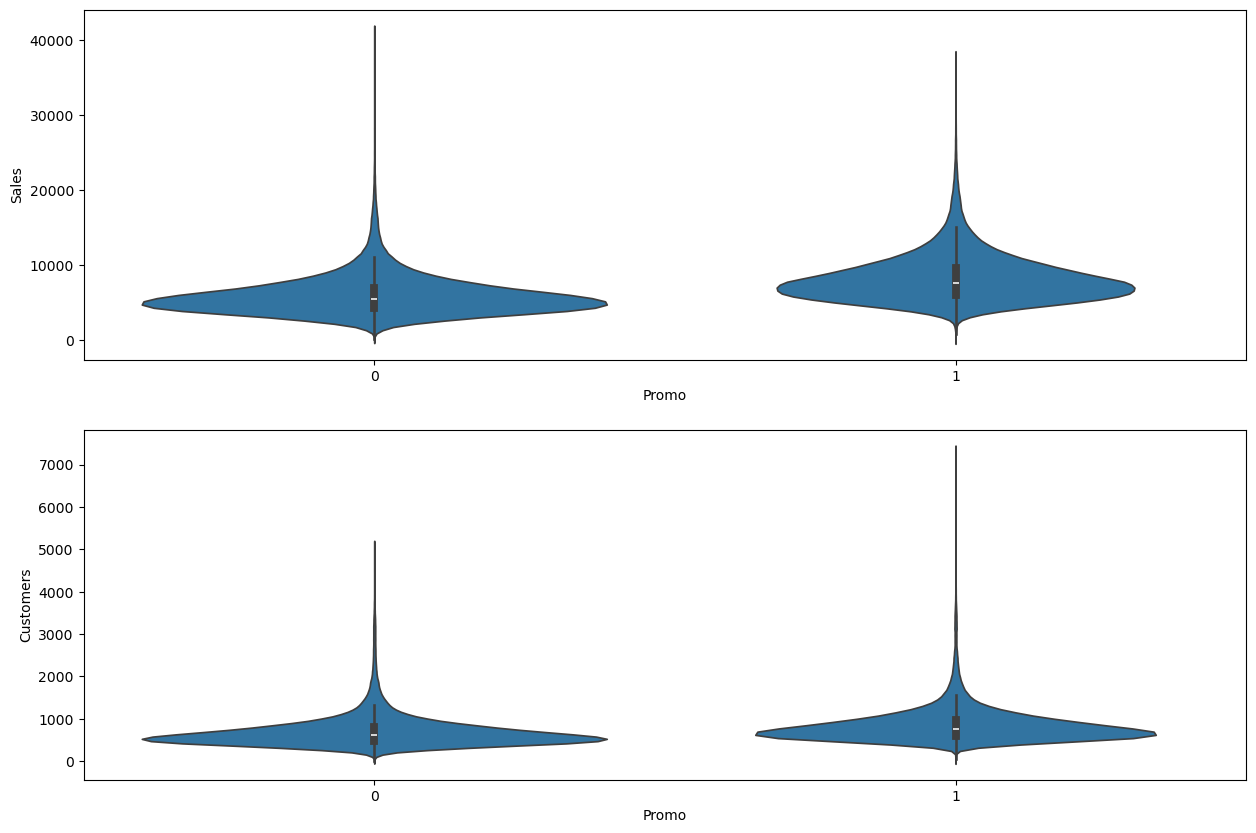

In [126]:
# Lets see if the promo makes an effect on sales and customers? This time using the violin plot instead of the bar plot.

plt.figure(figsize = [15, 10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

### Task: 4 TRAIN THE MODEL PART A (USING FACEBOOK PROPHET)

In [49]:
# import prophet

!pip install prophet
from prophet import Prophet
!pip install plotly


In [50]:
# Rename the columns of the date and the sales to ds and y
 def sales_predictions(Store_ID, sales_df, periods):
     sales_df = sales_df[sales_df['Store'] == Store_ID]
     sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
     sales_df = sales_df.sort_values('ds')

IndentationError: unexpected indent (620988671.py, line 2)

In [ ]:
def sales_predictions(Store_ID, sales_df, periods):
    # Filter data for the specific store
    sales_df = sales_df[sales_df['Store'] == Store_ID]

    # Select and rename columns for Prophet
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

    # Sort the data by date (ds)
    sales_df = sales_df.sort_values('ds')

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the sales data
    model.fit(sales_df)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=periods)

    # Make predictions
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Store {Store_ID}')
    plt.show()
    return sales_df


03:38:48 - cmdstanpy - INFO - Chain [1] start processing
03:38:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


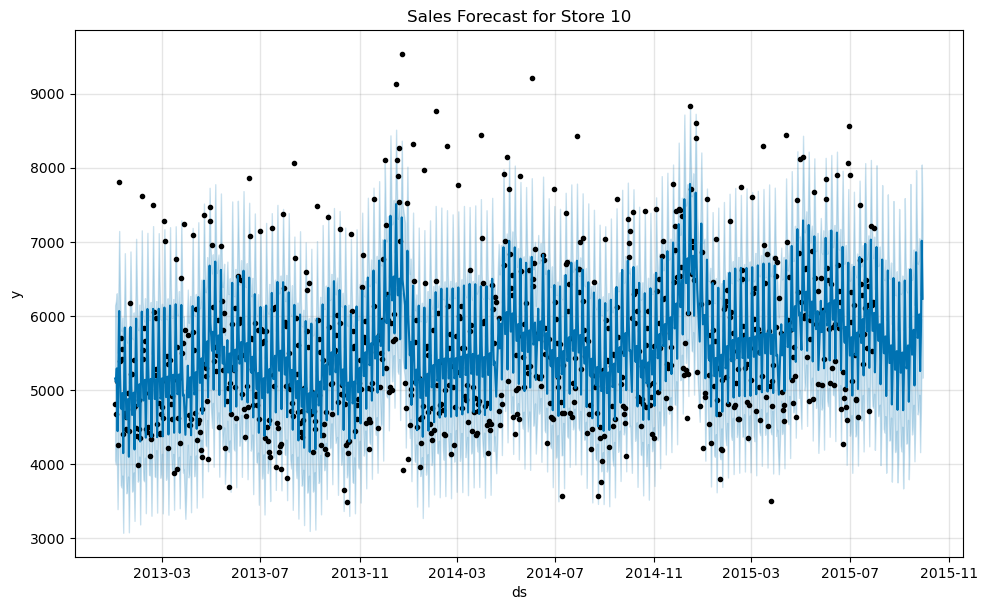

,ds,y
843273,2013-01-02,4812
842164,2013-01-03,4675
841056,2013-01-04,5114
839949,2013-01-05,4256
838824,2013-01-07,7804
...,...,...
4461,2015-07-27,7212
3348,2015-07-28,6140
2235,2015-07-29,5524
1122,2015-07-30,6186


In [144]:
df = sales_predictions(10, sales_train_all_df, 60)
df

In [ ]:
df

In [52]:
def sales_predictions(Store_ID, sales_df, periods):
    # Filter data for the specific store
    sales_df = sales_df[sales_df['Store'] == Store_ID]

    # Select and rename columns for Prophet
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

    # Sort the data by date (ds)
    sales_df = sales_df.sort_values('ds')

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the sales data
    model.fit(sales_df)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=periods)

    # Make predictions
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Store {Store_ID}')
    plt.show()

    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel ='Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)


01:50:44 - cmdstanpy - INFO - Chain [1] start processing
01:50:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


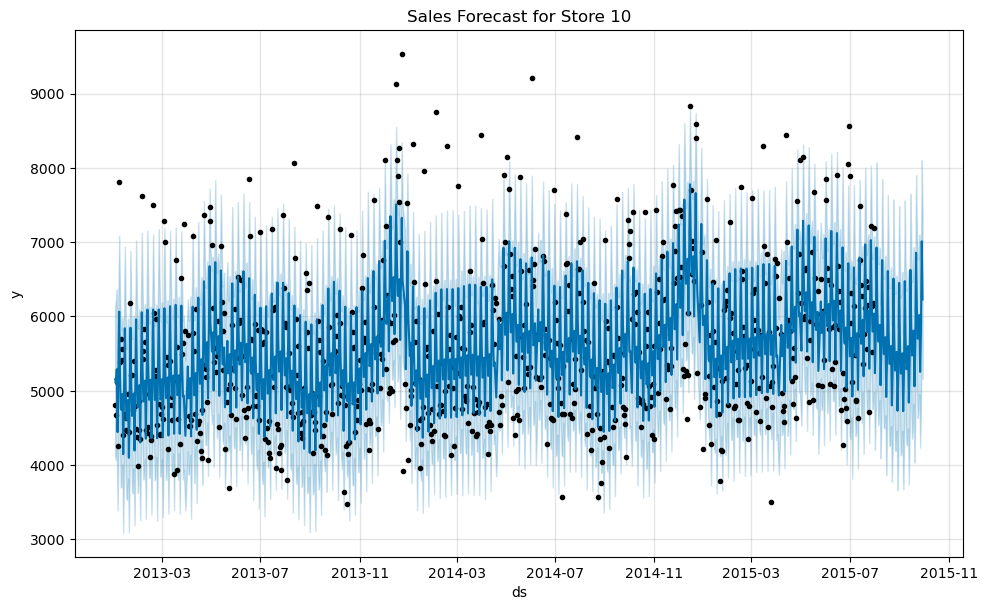

01:50:44 - cmdstanpy - INFO - Chain [1] start processing
01:50:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series

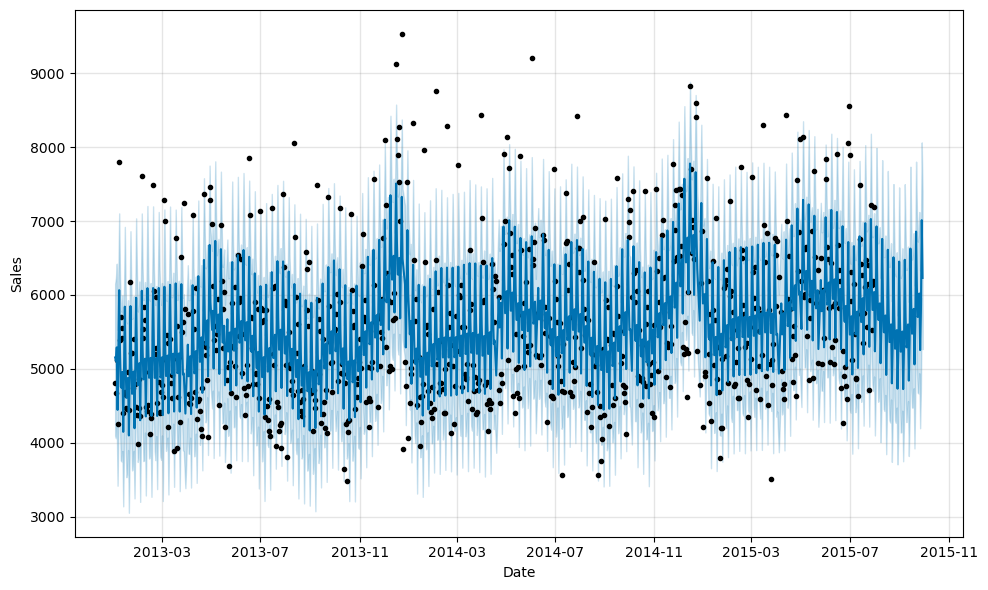

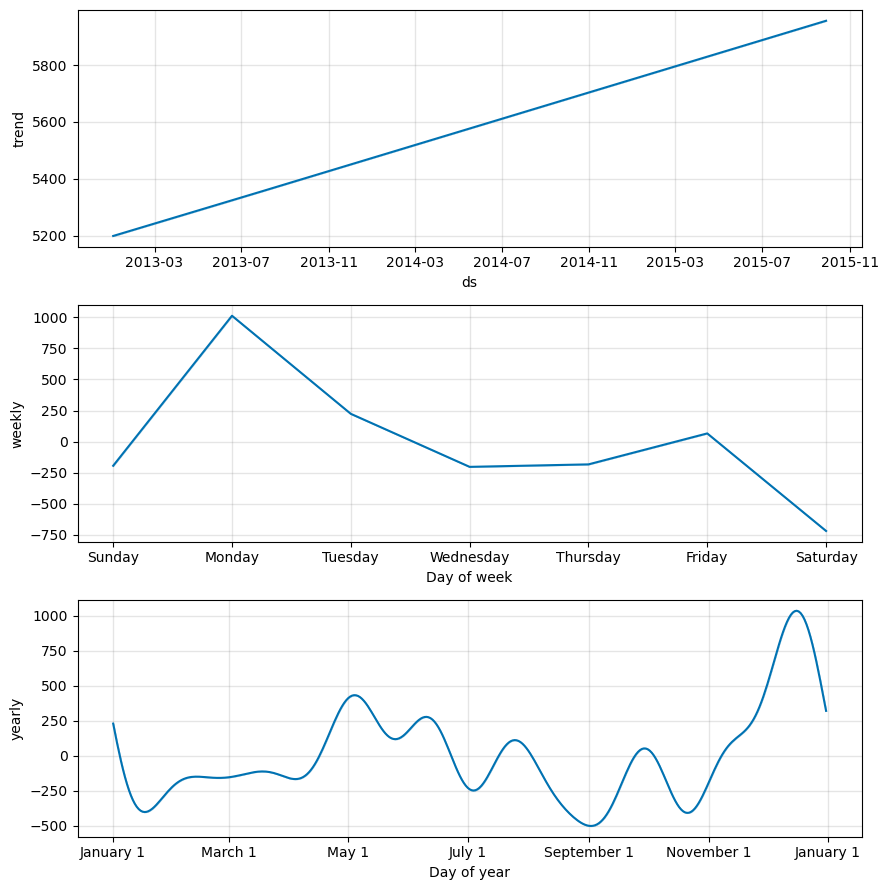

In [53]:
sales_predictions(10, sales_train_all_df, 60)

### TASK 5: TRAIN THE MODEL PART B

* StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [54]:
# Combine the holidays, create a new function that takes the holiday and generate the predicitons for store no.6 for 90 days 

def sales_predictions(Store_ID, sales_df, holidays, periods):
    # Filter data for the specific store
    sales_df = sales_df[sales_df['Store'] == Store_ID]

    # Select and rename columns for Prophet
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

    # Sort the data by date (ds)
    sales_df = sales_df.sort_values('ds')

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the sales data
    model.fit(sales_df)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=periods)

    # Make predictions
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Store {Store_ID}')
    plt.show()

    model = Prophet(holidays = holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel ='Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

In [101]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] ==1].loc[:, 'Date'].values

In [102]:
school_holidays

array(['2015-07-31T00:00:00.000000000', '2015-07-31T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', ...,
       '2013-01-02T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [103]:
school_holidays.shape

(163143,)

In [98]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_train_all_df[ (sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [107]:
state_holidays.shape

(0,)

In [110]:
state_holidays = pd.DataFrame({'ds' : pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [111]:
state_holidays

,ds,holiday


In [112]:
school_holidays = pd.DataFrame({'ds' : pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})

In [113]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163138,2013-01-02,school_holiday
163139,2013-01-02,school_holiday
163140,2013-01-02,school_holiday
163141,2013-01-02,school_holiday


In [114]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844370,1111,3,2013-01-02,5097,505,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,2
844371,1112,3,2013-01-02,10797,892,0,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,2013,1,2
844372,1113,3,2013-01-02,6218,753,0,0,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,2013,1,2
844373,1114,3,2013-01-02,20642,3401,0,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0,2013,1,2


In [115]:
# Conctenate both school and state holidays
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [116]:
school_state_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163138,2013-01-02,school_holiday
163139,2013-01-02,school_holiday
163140,2013-01-02,school_holiday
163141,2013-01-02,school_holiday


02:39:31 - cmdstanpy - INFO - Chain [1] start processing
02:39:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


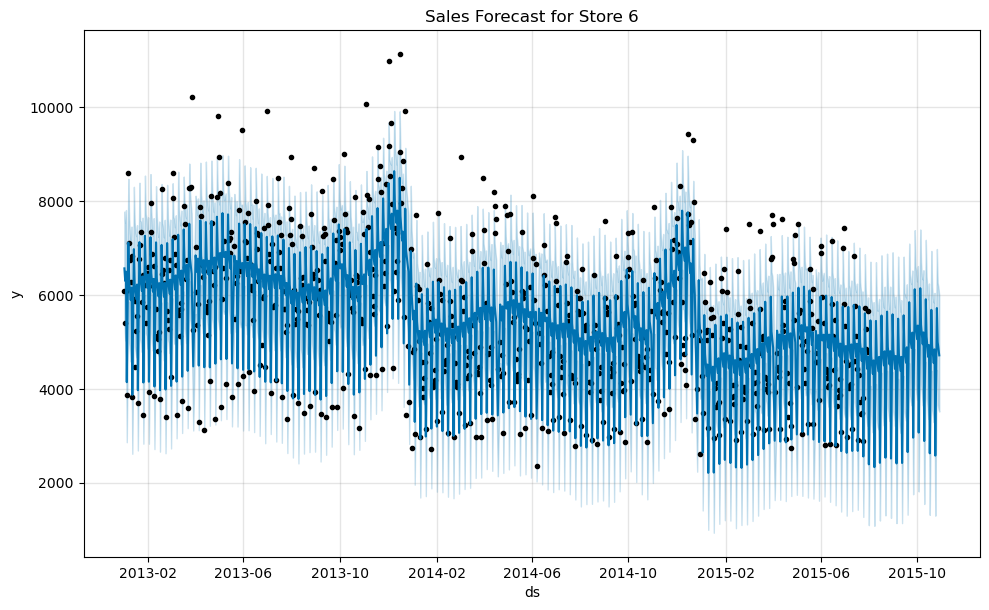

02:39:40 - cmdstanpy - INFO - Chain [1] start processing
02:39:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\vulev\env\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series

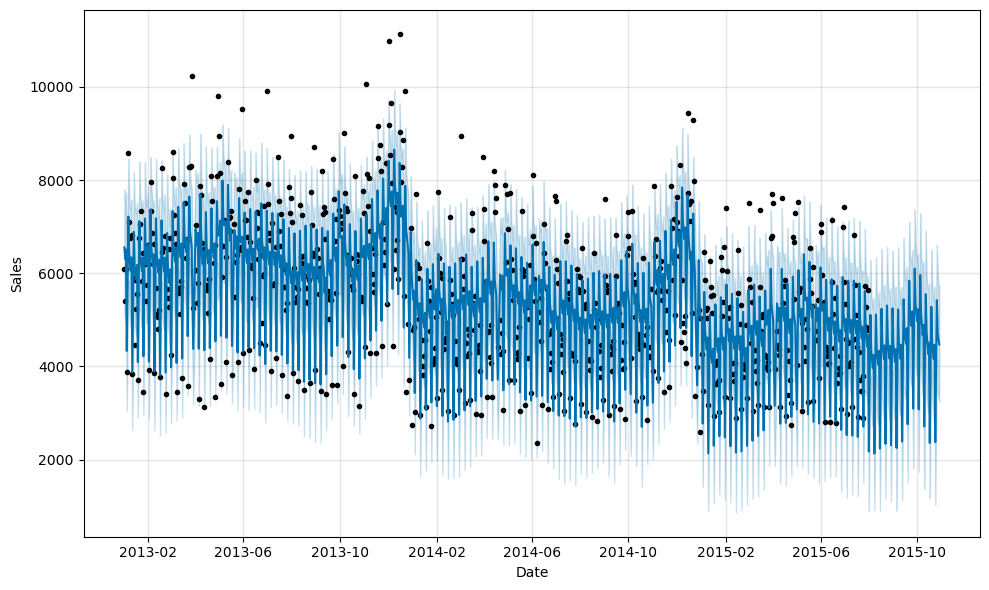

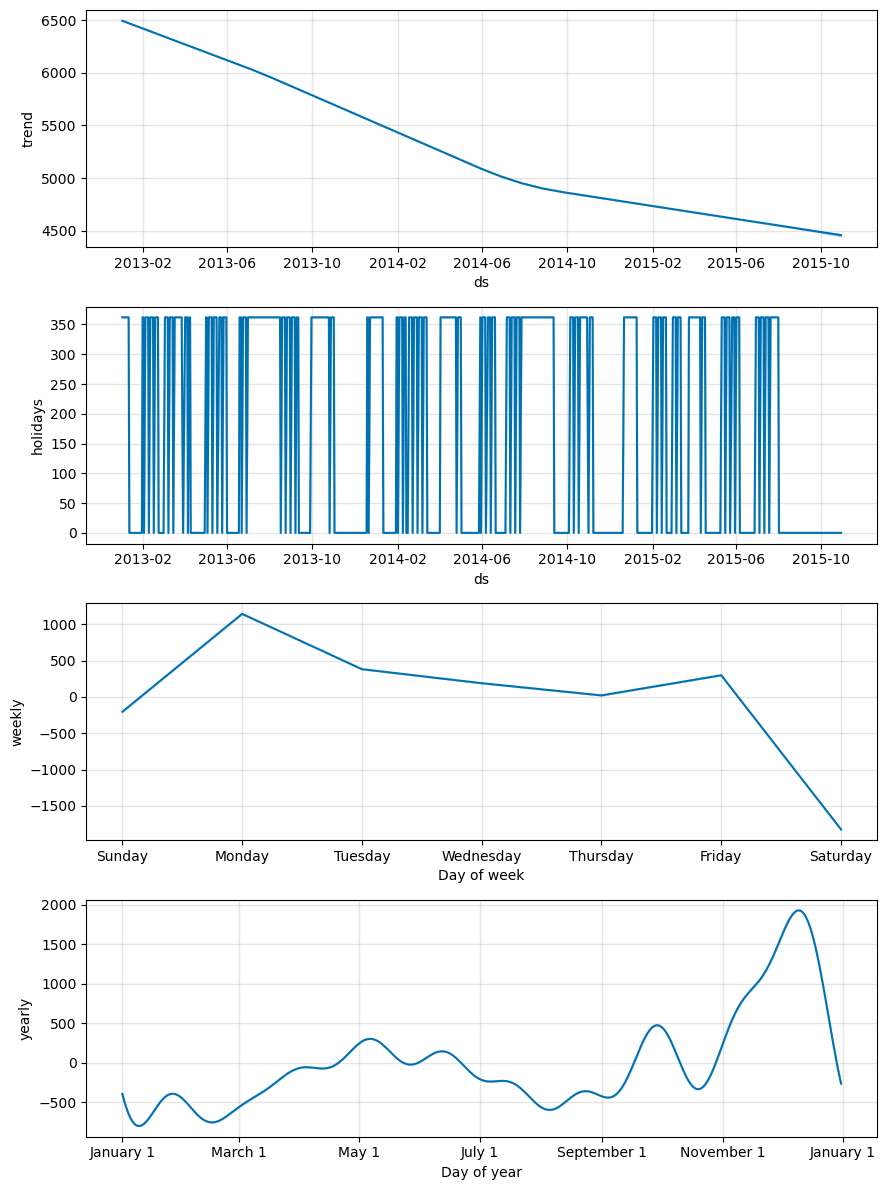

In [117]:
# Lets make predictions using holidays for store number 6
sales_predictions(6, sales_train_all_df, school_state_holidays, 90)